In [1]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense,Flatten
from keras.optimizers import Adam 
from keras.metrics import categorical_crossentropy
from keras.layers import Conv2D, MaxPooling2D
from keras.models import model_from_json
import cv2
import os
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
import itertools
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
import math

Using TensorFlow backend.


In [2]:
import pickle
import numpy as np

training_file = './traffic-signs-data/train.p' 
#validation_file = './traffic-signs-data/valid.p'
testing_file = './traffic-signs-data/test.p' 

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
#with open(validation_file, mode='rb') as f:
#    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

    
    
#X_train, y_train = train['features'], train['labels']
X_train, X_val, y_train, y_val = train_test_split(train['features'], train['labels'], random_state=0, test_size=0.33)
#X_test, y_test = test['features'], test['labels']

In [3]:
n_train = X_train.shape[0] 
#n_validation = X_valid.shape[0] 
#n_test = X_test.shape[0]
image_shape = X_train.shape[1:] 
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
#print("Number of validation examples =", n_validation)
#print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 26270
Image data shape = (32, 32, 3)
Number of classes = 43


In [4]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3."
assert(X_val.shape[0] == y_val.shape[0]), "The number of images is not equal to the number of labels."
assert(X_val.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3."

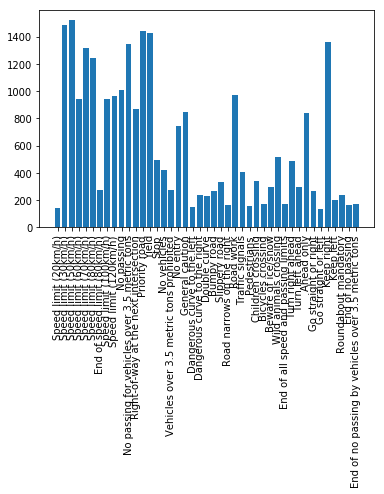

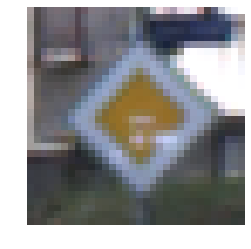

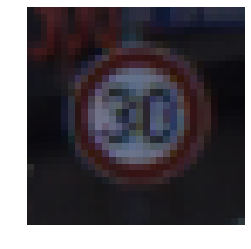

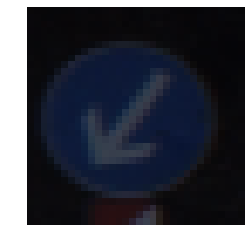

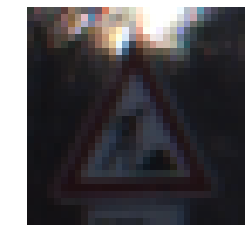

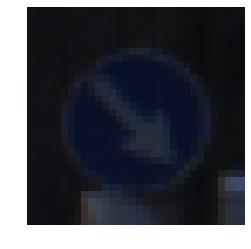

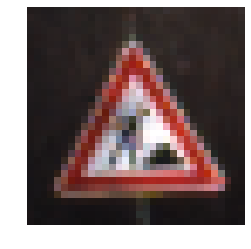

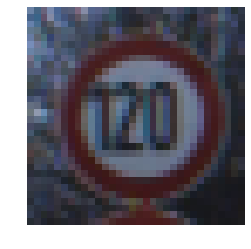

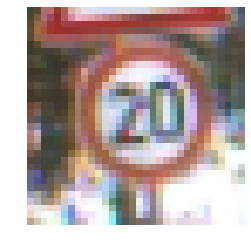

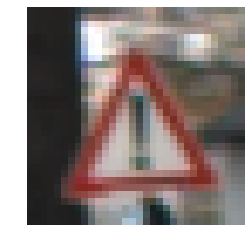

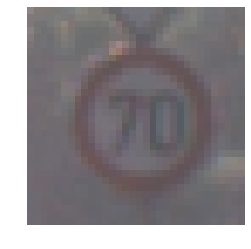

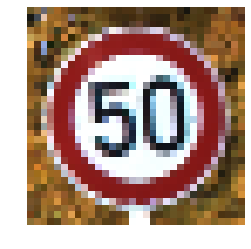

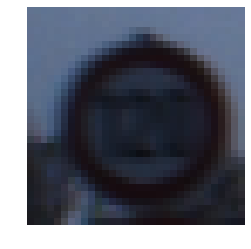

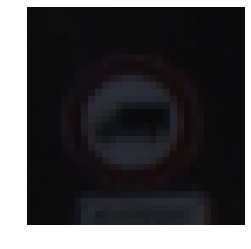

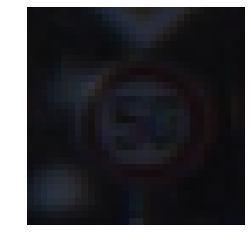

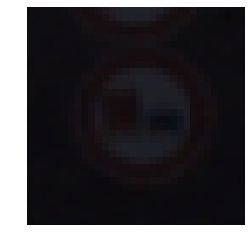

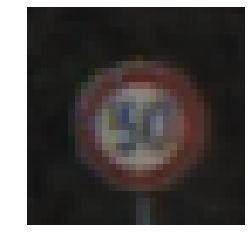

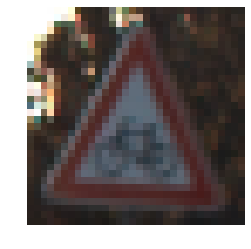

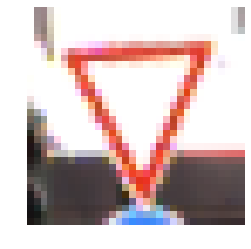

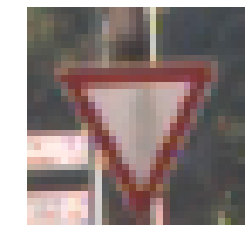

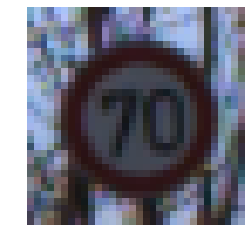

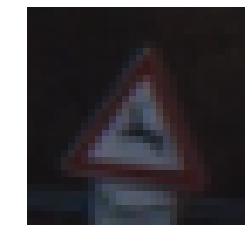

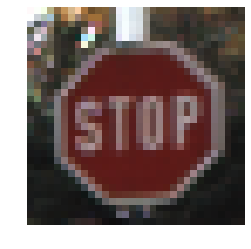

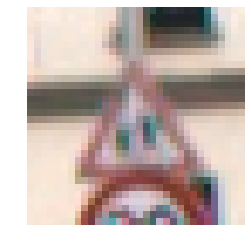

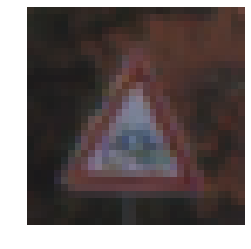

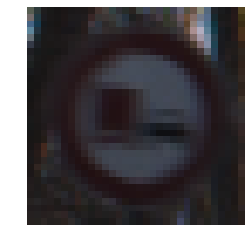

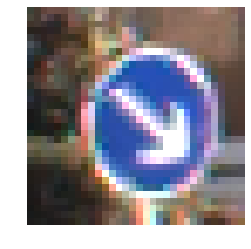

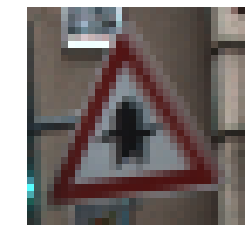

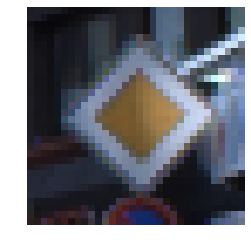

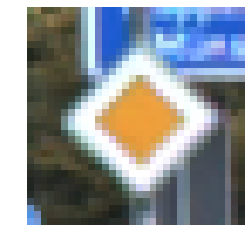

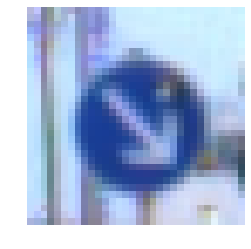

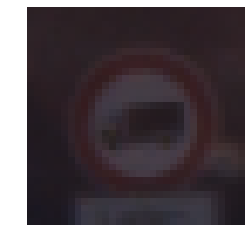

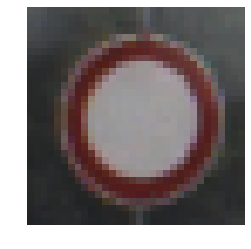

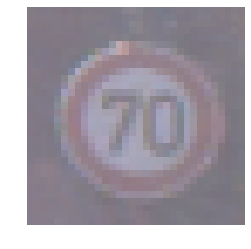

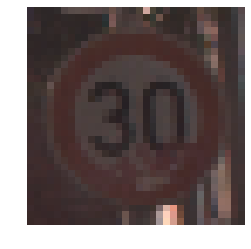

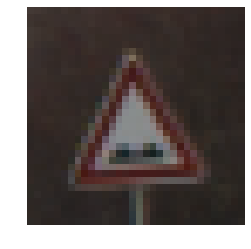

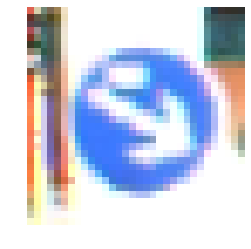

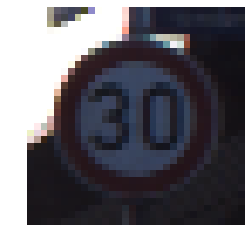

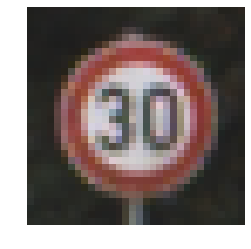

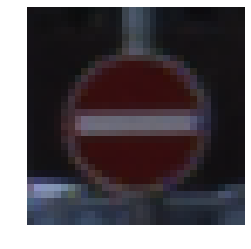

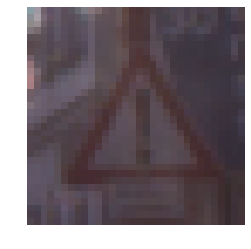

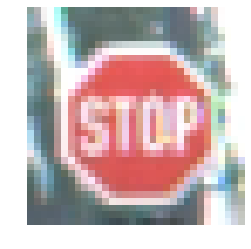

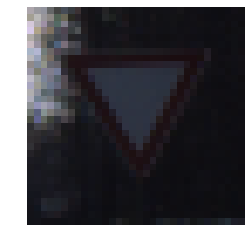

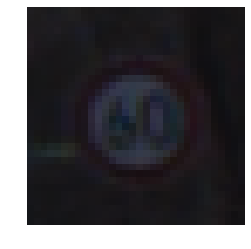

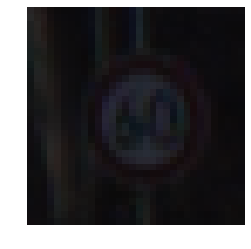

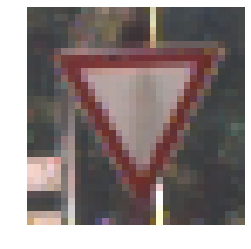

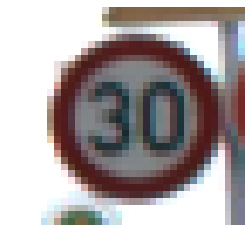

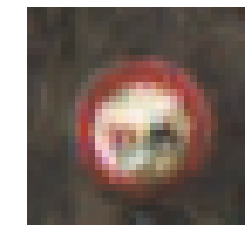

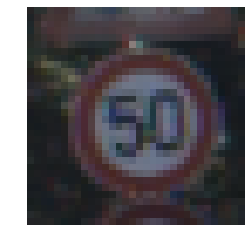

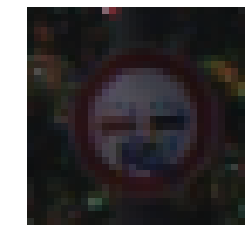

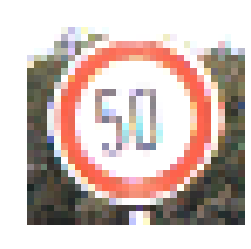

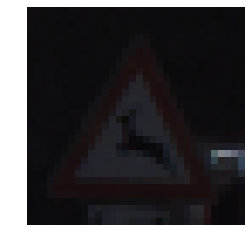

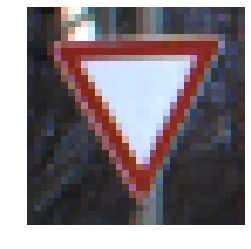

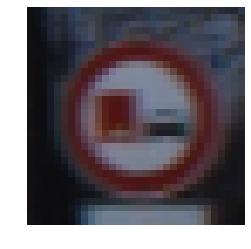

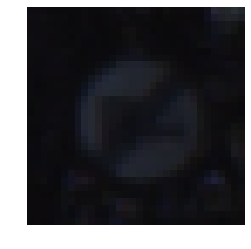

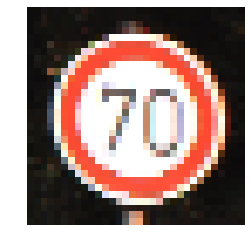

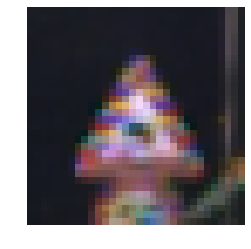

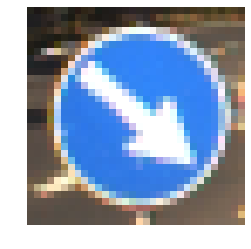

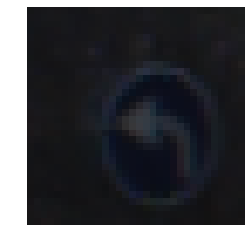

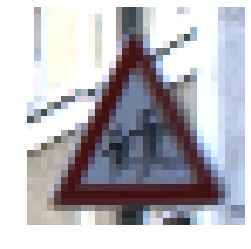

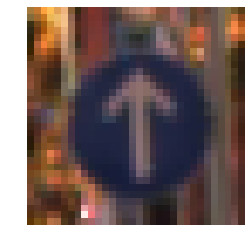

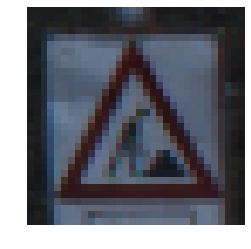

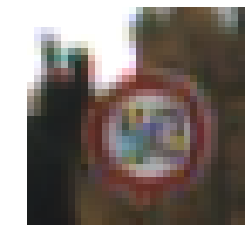

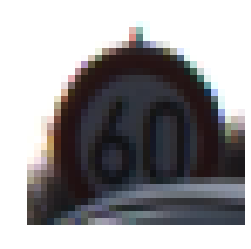

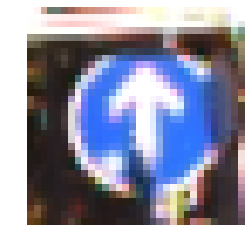

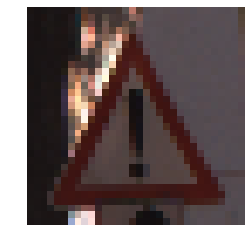

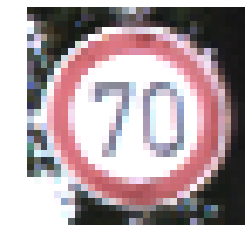

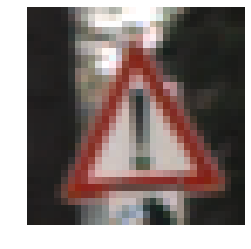

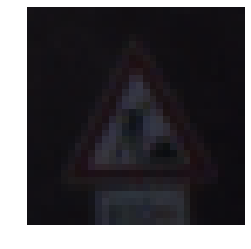

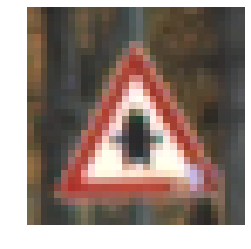

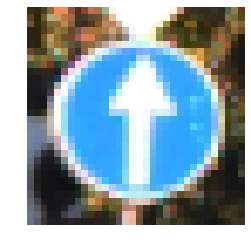

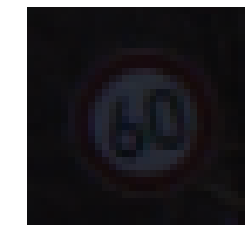

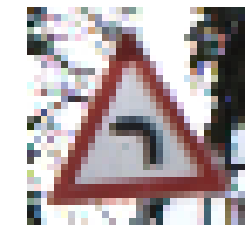

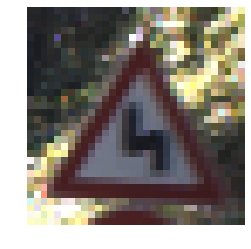

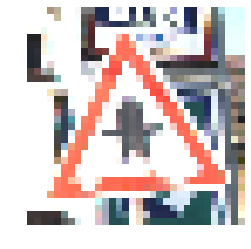

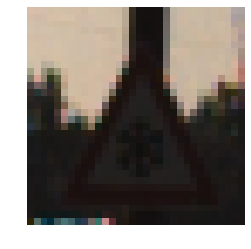

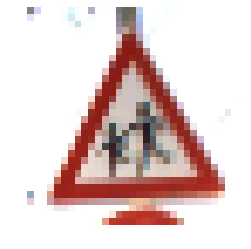

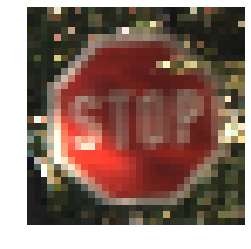

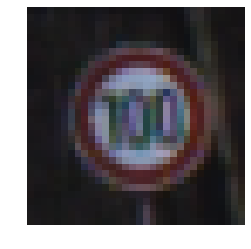

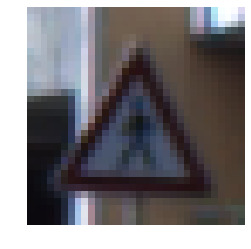

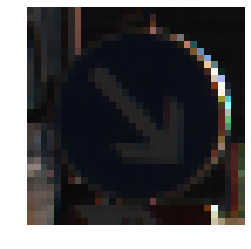

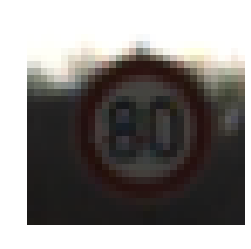

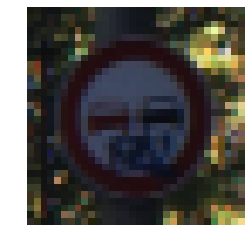

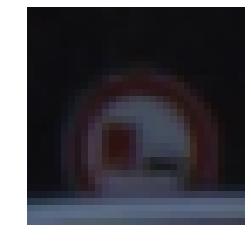

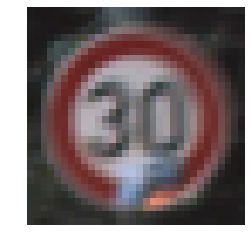

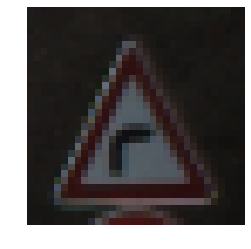

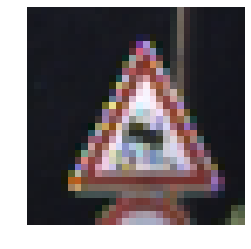

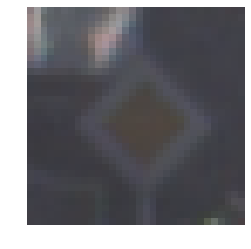

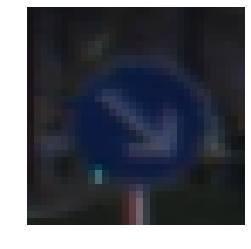

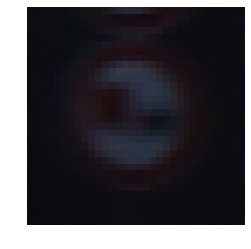

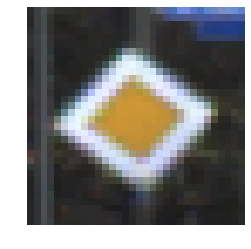

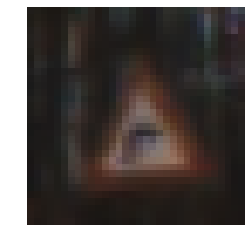

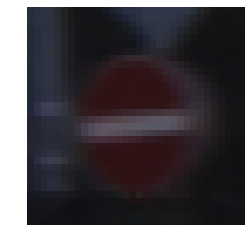

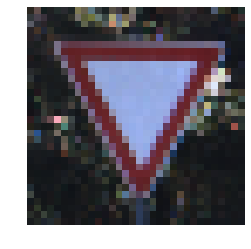

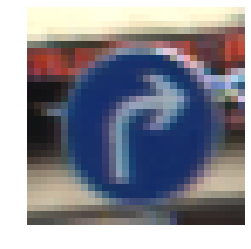

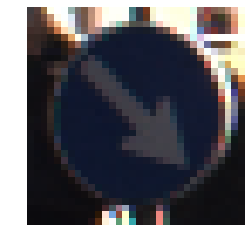

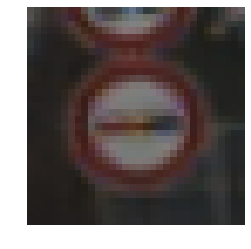

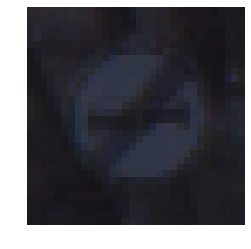

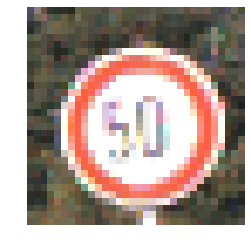

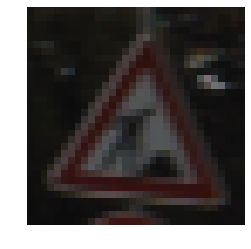

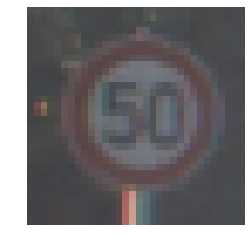

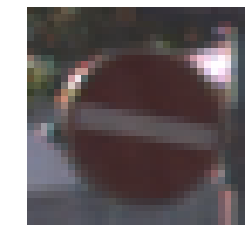

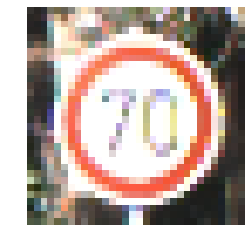

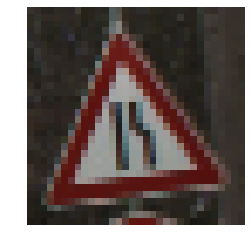

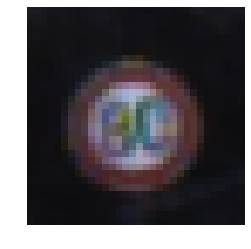

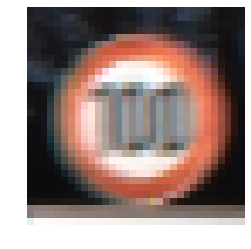

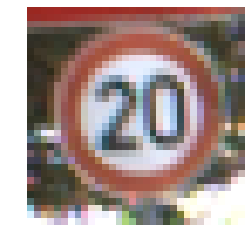

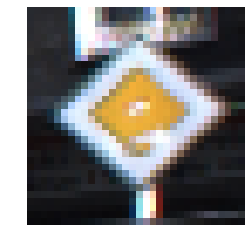

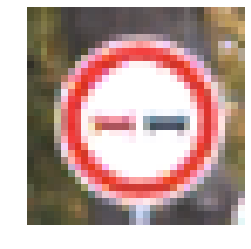

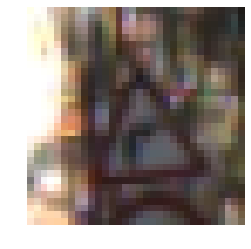

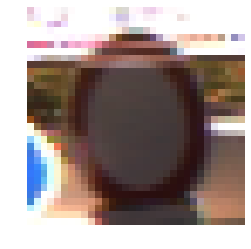

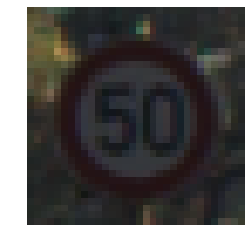

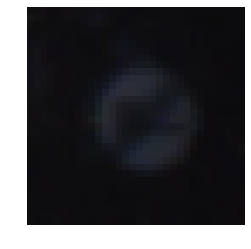

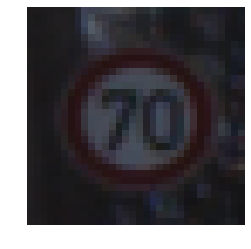

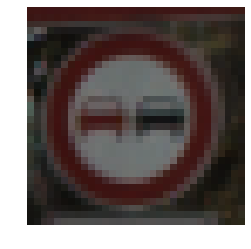

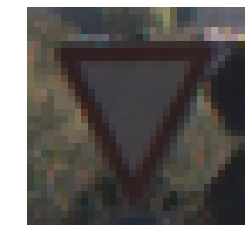

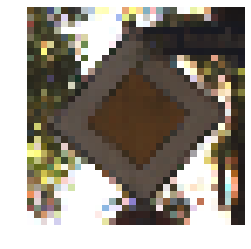

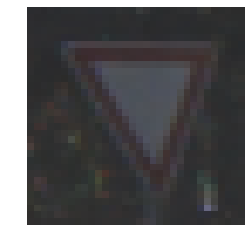

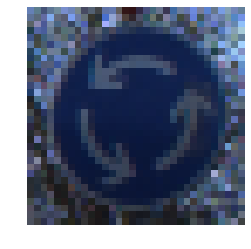

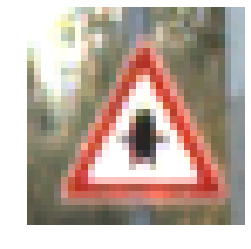

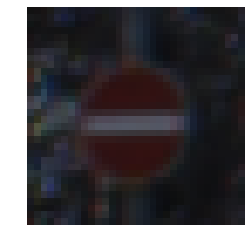

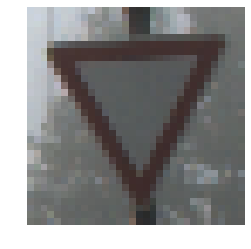

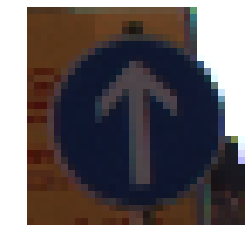

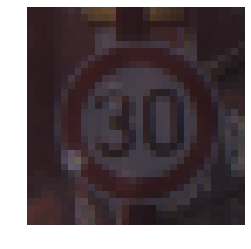

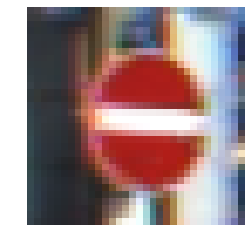

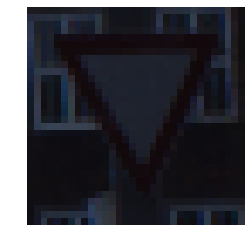

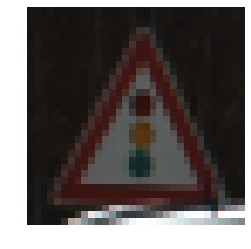

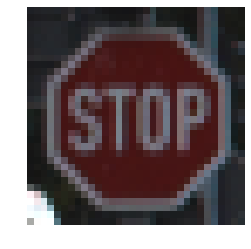

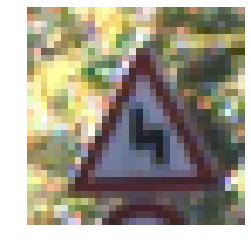

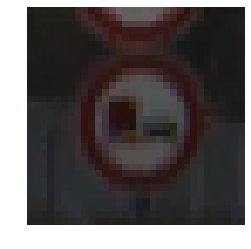

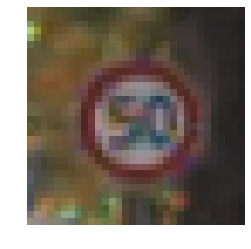

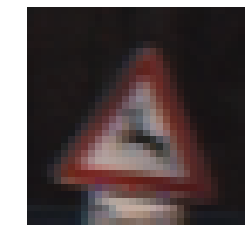

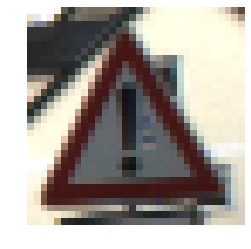

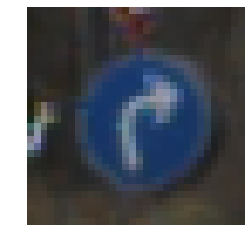

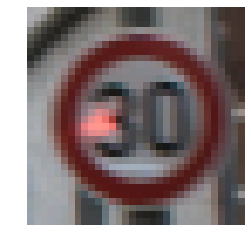

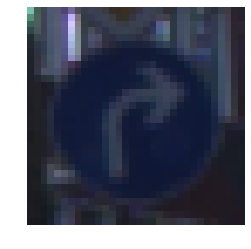

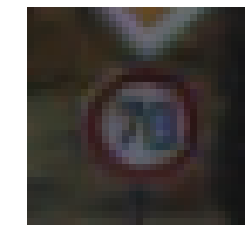

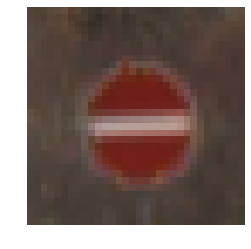

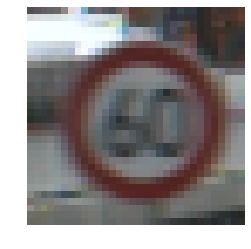

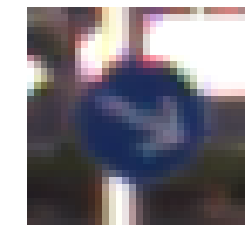

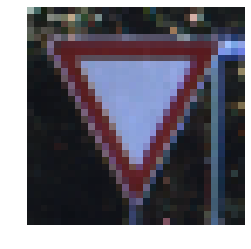

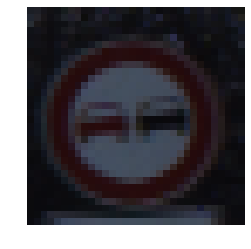

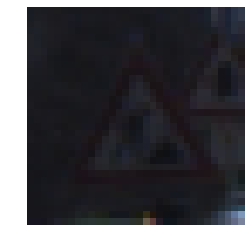

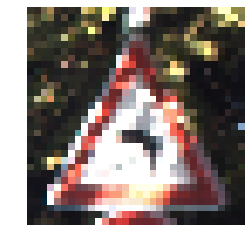

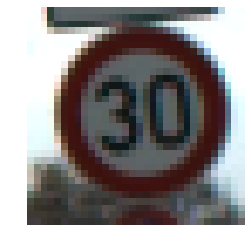

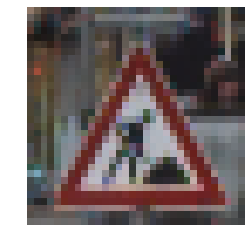

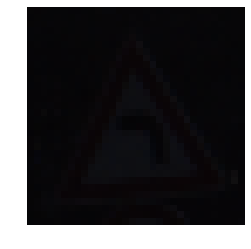

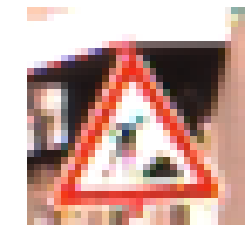

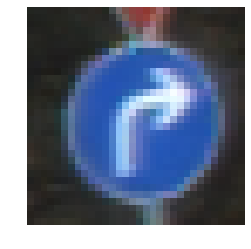

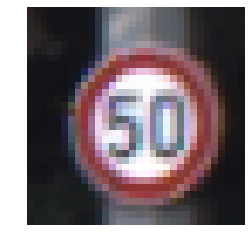

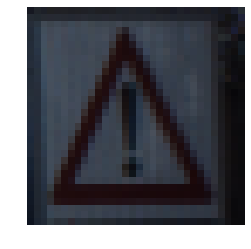

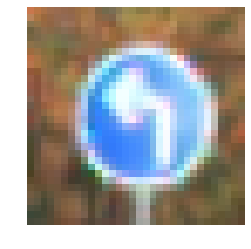

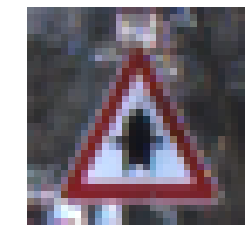

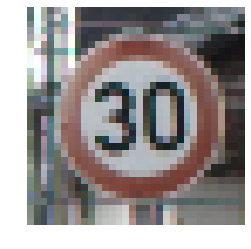

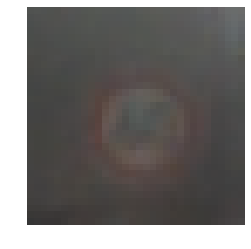

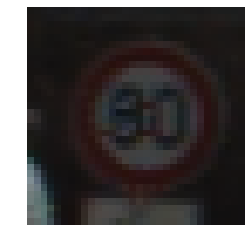

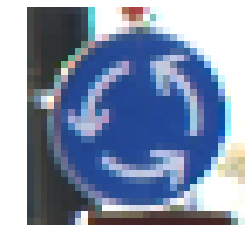

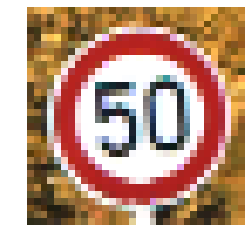

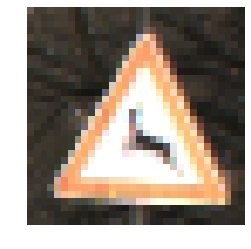

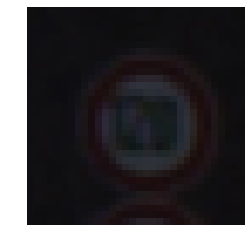

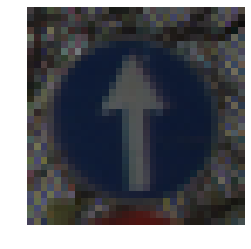

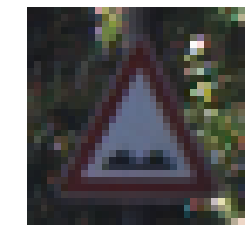

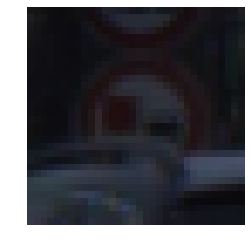

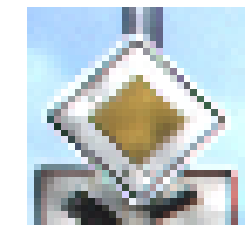

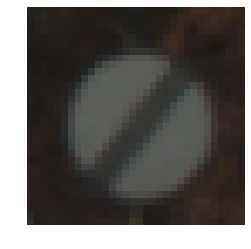

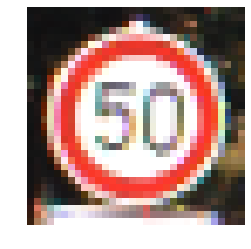

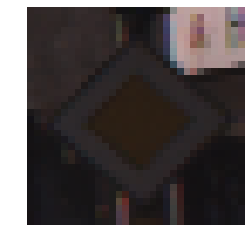

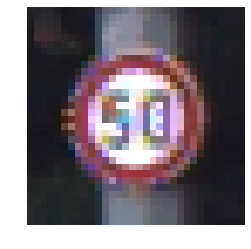

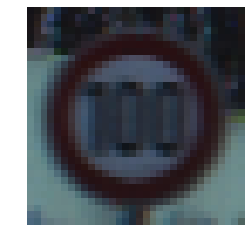

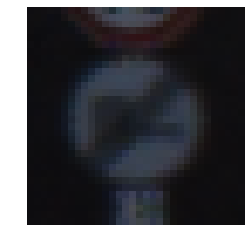

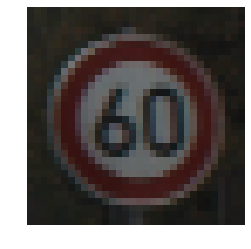

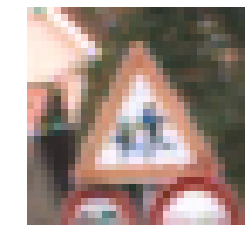

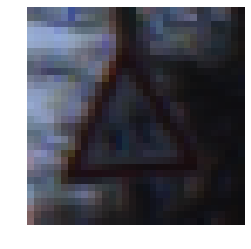

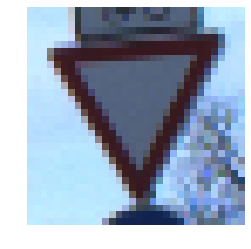

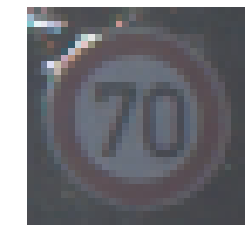

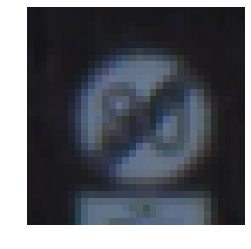

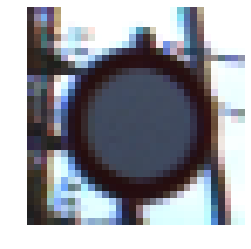

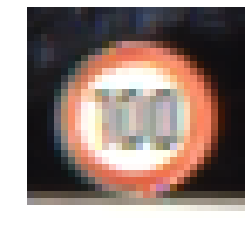

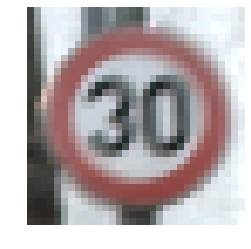

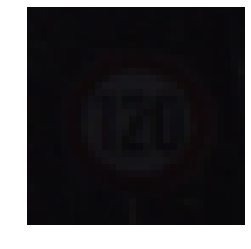

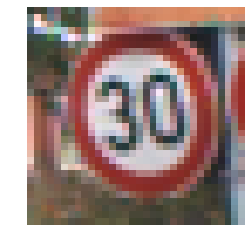

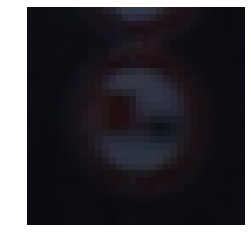

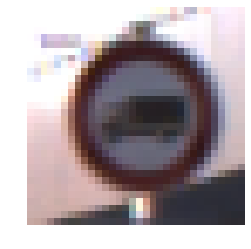

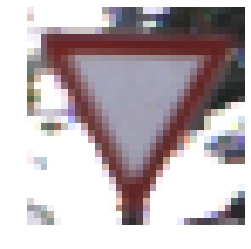

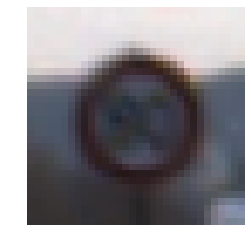

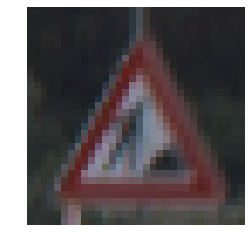

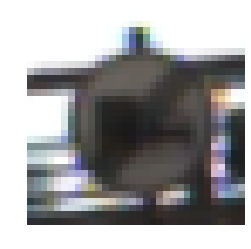

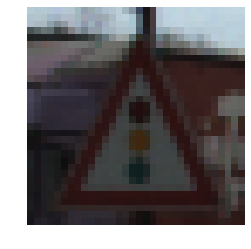

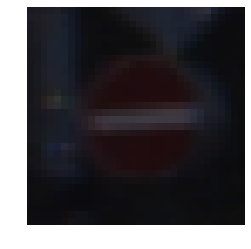

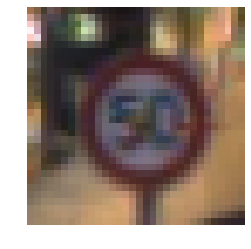

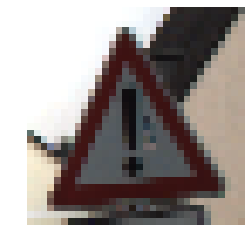

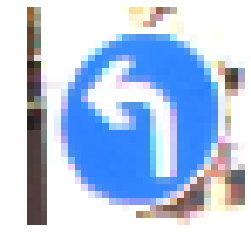

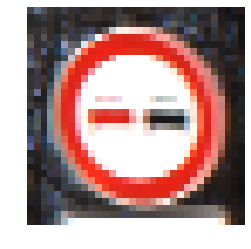

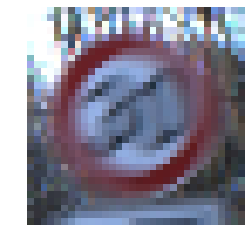

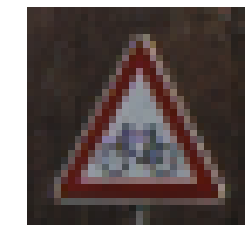

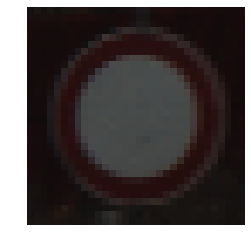

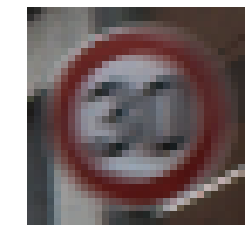

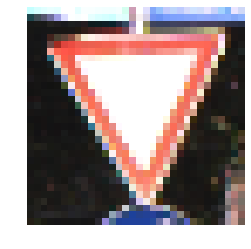

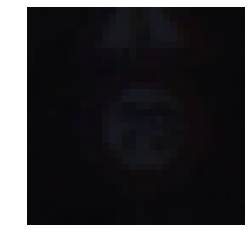

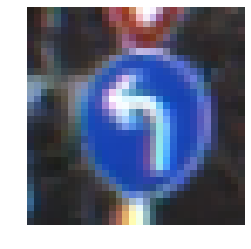

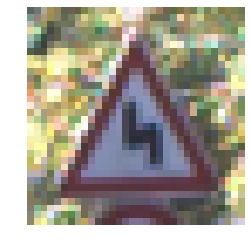

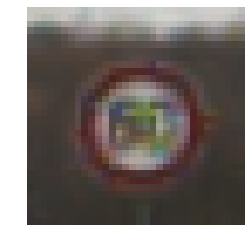

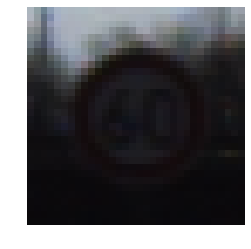

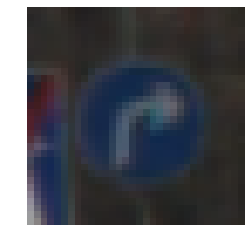

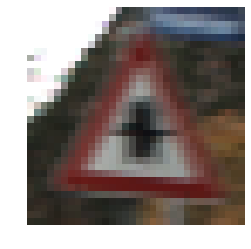

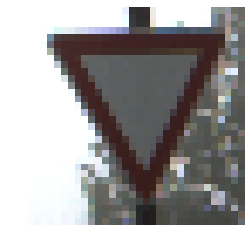

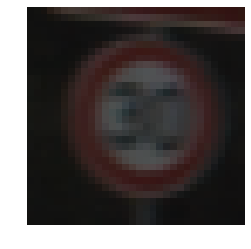

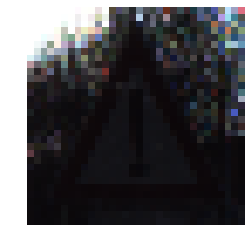

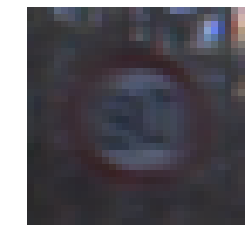

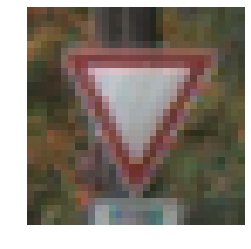

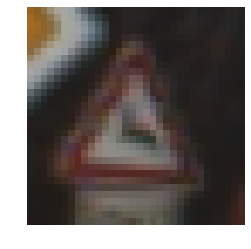

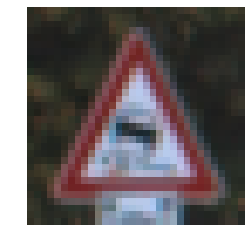

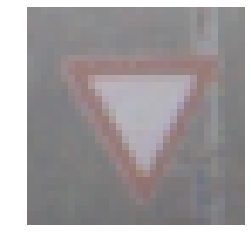

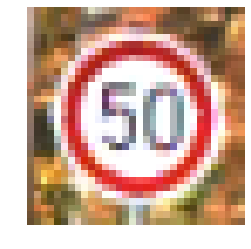

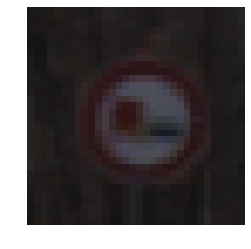

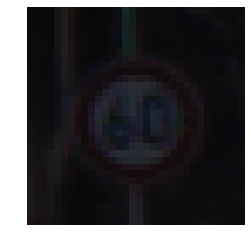

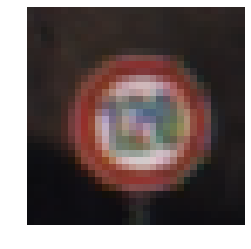

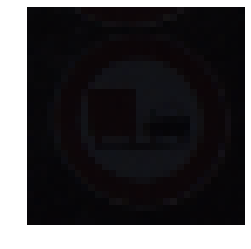

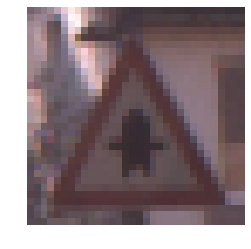

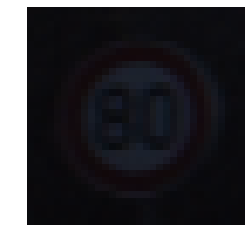

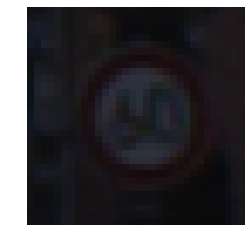

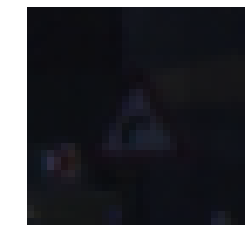

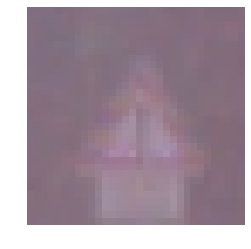

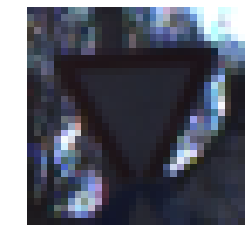

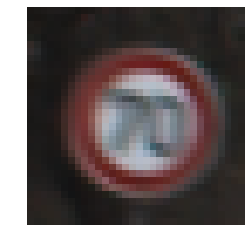

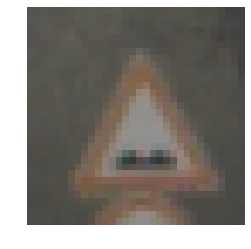

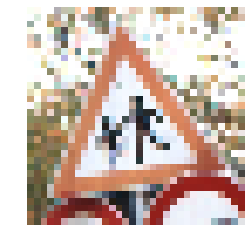

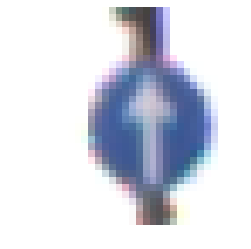

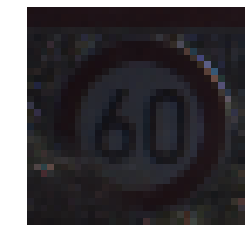

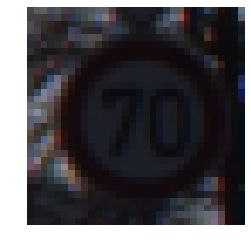

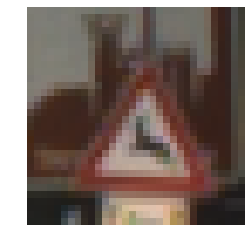

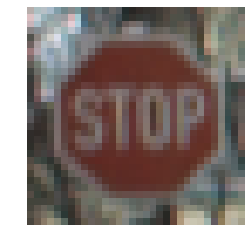

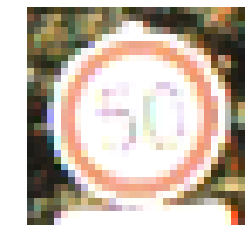

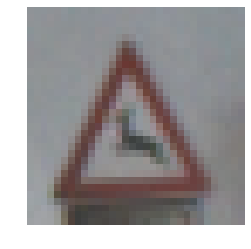

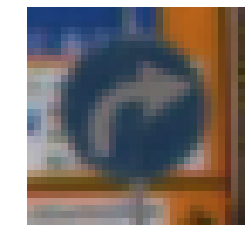

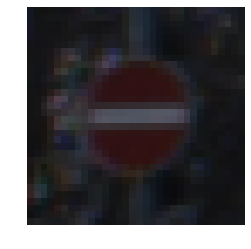

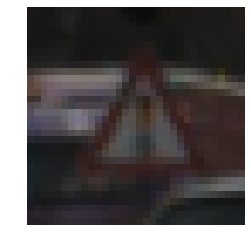

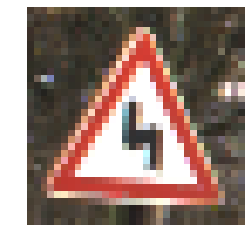

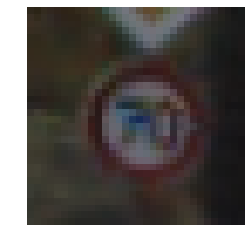

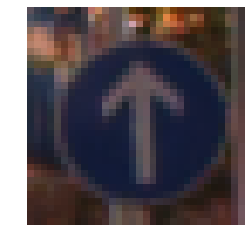

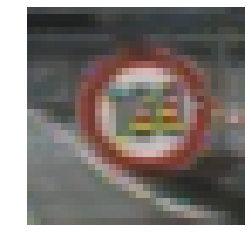

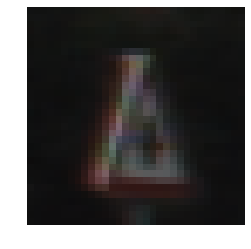

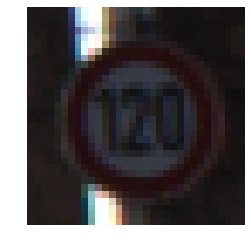

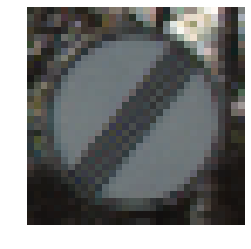

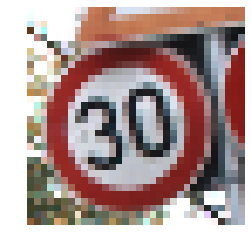

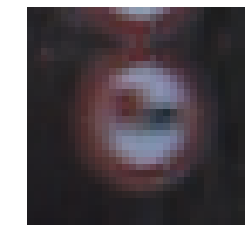

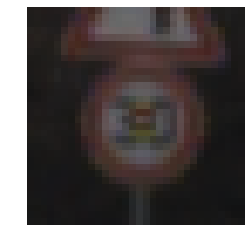

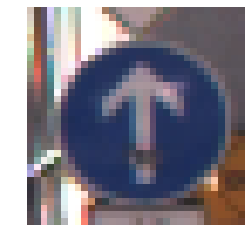

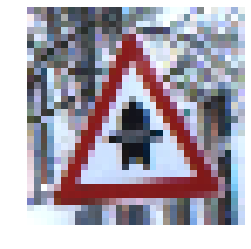

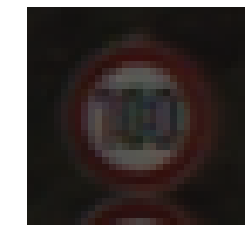

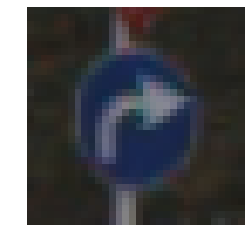

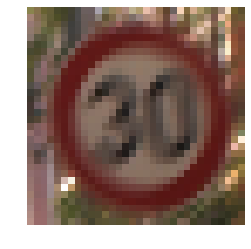

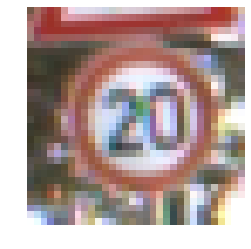

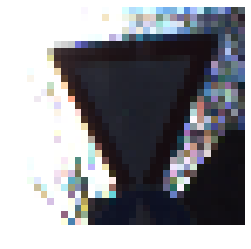

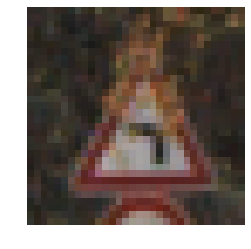

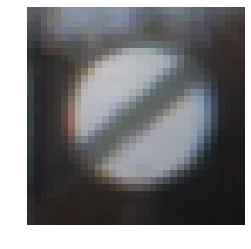

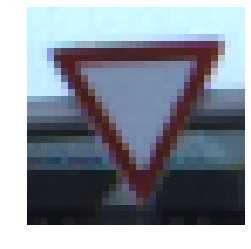

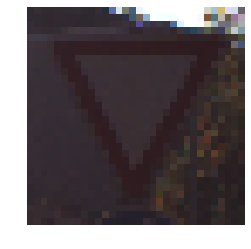

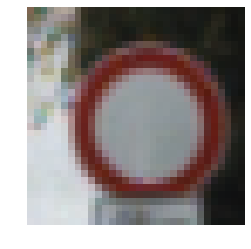

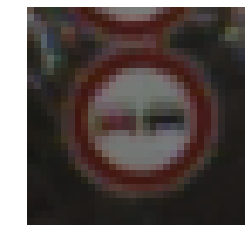

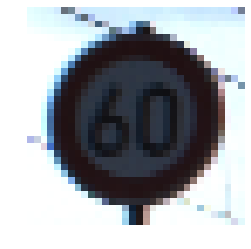

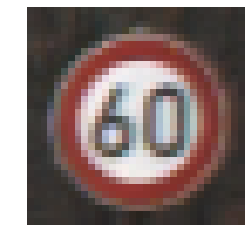

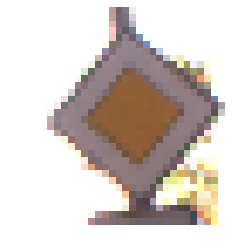

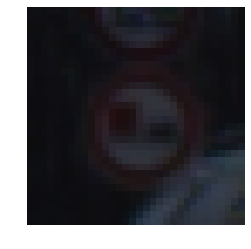

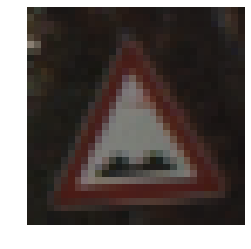

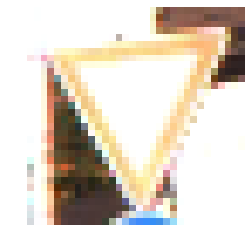

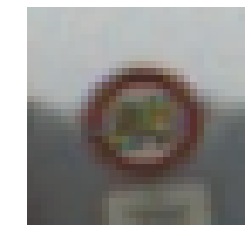

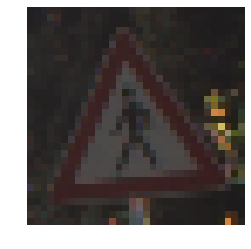

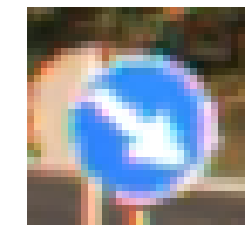

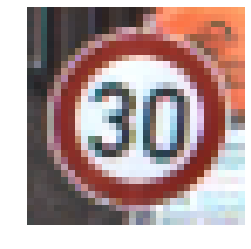

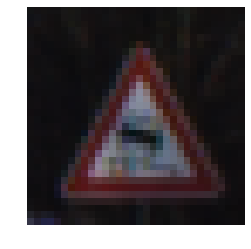

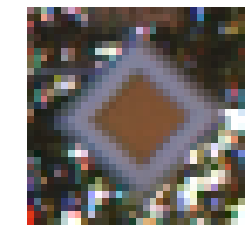

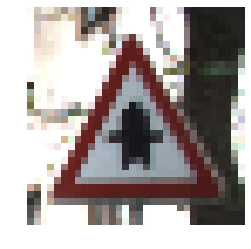

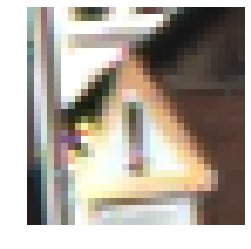

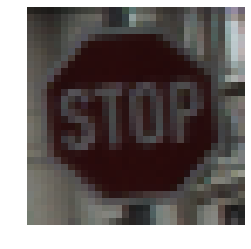

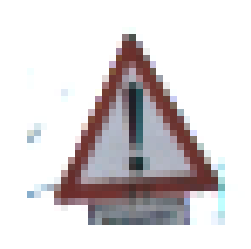

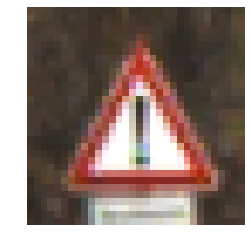

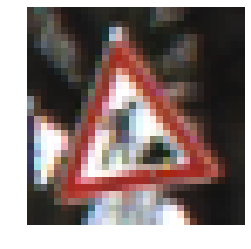

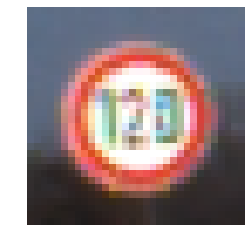

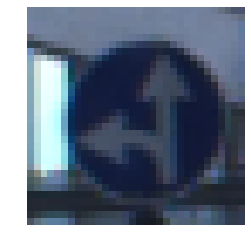

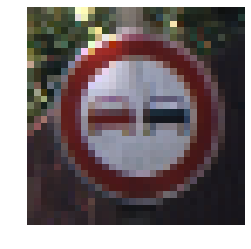

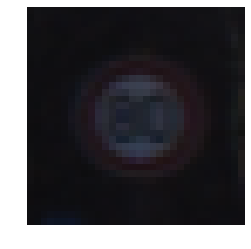

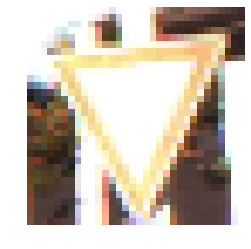

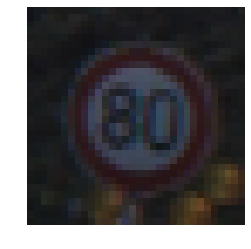

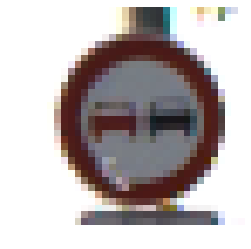

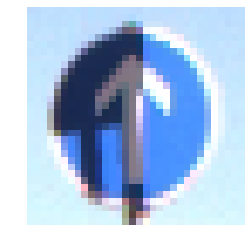

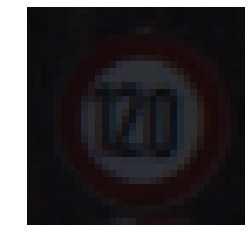

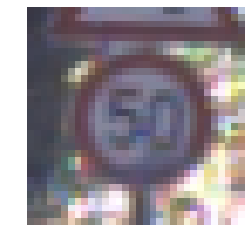

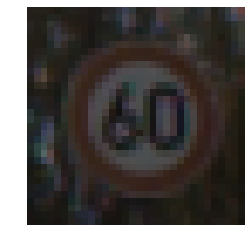

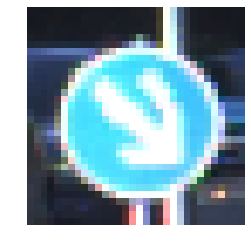

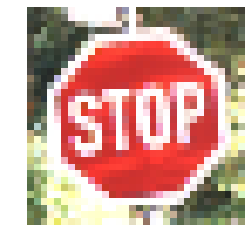

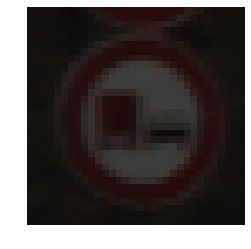

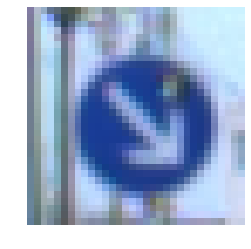

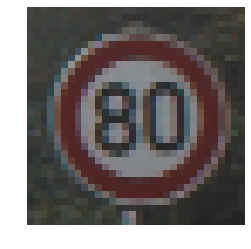

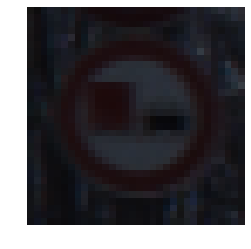

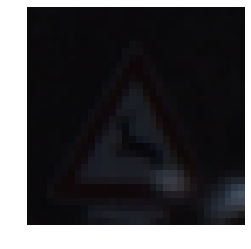

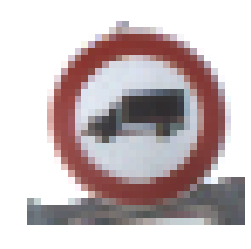

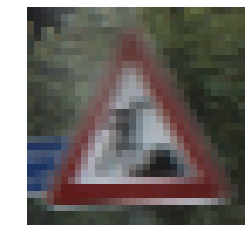

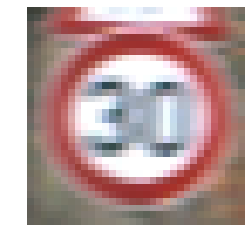

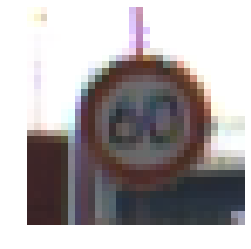

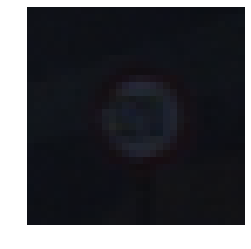

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

signs_names = []
df = pd.read_csv('./signnames.csv')
for name in df['SignName']:
    signs_names.append(name)

app_times = np.unique(y_train, return_counts=True)
plt.xticks(rotation=90)
plt.bar(app_times[0], app_times[1], tick_label=signs_names)    
plt.show()
count = 0
for image in X_train:
    plt.axis("off")
    plt.imshow(image)
    plt.show()  
    count = count + 1
    if count == 300:
        break
%matplotlib inline

In [6]:
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_train = X_train / 255 - 0.5
X_val = X_val / 255 - 0.5

In [7]:
assert(math.isclose(np.min(X_train), -0.5, abs_tol=1e-5) and math.isclose(np.max(X_train), 0.5, abs_tol=1e-5)), "The range of the training data is: %.1f to %.1f" % (np.min(X_train), np.max(X_train))
assert(math.isclose(np.min(X_val), -0.5, abs_tol=1e-5) and math.isclose(np.max(X_val), 0.5, abs_tol=1e-5)), "The range of the validation data is: %.1f to %.1f" % (np.min(X_val), np.max(X_val))

In [8]:
# TODO: Compile and train the model here.
from keras.utils import np_utils

Y_train = np_utils.to_categorical(y_train, 43)
Y_val = np_utils.to_categorical(y_val, 43)

In [ ]:
from keras.layers import Dropout
import tensorflow as tf
# Fix of AttributeError: module 'tensorflow.python' has no attribute 'control_flow_ops'


model = Sequential()
# Conv 1
model.add(Conv2D(6, 5, 5, input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2,2)))
#model.add((Dropout(0.5)))
model.add(Activation('relu'))
# Conv 2
model.add(Conv2D(16, 5, 5, input_shape=(10, 10, 16)))
model.add(MaxPooling2D((2,2)))
#model.add((Dropout(0.5)))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(128))
model.add((Dropout(0.5)))
model.add(Activation('relu'))
model.add(Dense(43, activation='softmax'))

model.summary()
# TODO: Compile and train the model here.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history = model.fit(X_train, Y_train,
                    batch_size=128, nb_epoch=100,
                    verbose=1, validation_data=(X_val, Y_val))
#serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

#serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


C:\Users\ISUS\Anaconda3\envs\env\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(6, (5, 5), input_shape=(32, 32, 3...)`
  
C:\Users\ISUS\Anaconda3\envs\env\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (5, 5), input_shape=(10, 10, 1...)`
  del sys.path[0]


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         456       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
activation_2 (Activation)    (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
__________

C:\Users\ISUS\Anaconda3\envs\env\lib\site-packages\ipykernel_launcher.py:31: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 26270 samples, validate on 12939 samples
Epoch 1/100
26270/26270 [==============================] - 32s 1ms/step - loss: 2.3929 - acc: 0.3614 - val_loss: 1.0263 - val_acc: 0.7317
Epoch 2/100
26270/26270 [==============================] - 30s 1ms/step - loss: 0.9675 - acc: 0.7150 - val_loss: 0.4707 - val_acc: 0.8915
Epoch 3/100
26270/26270 [==============================] - 32s 1ms/step - loss: 0.6051 - acc: 0.8213 - val_loss: 0.3165 - val_acc: 0.9270
Epoch 4/100
26270/26270 [==============================] - 38s 1ms/step - loss: 0.4394 - acc: 0.8716 - val_loss: 0.2263 - val_acc: 0.9488
Epoch 5/100
26270/26270 [==============================] - 39s 1ms/step - loss: 0.3509 - acc: 0.8978 - val_loss: 0.1829 - val_acc: 0.9592
Epoch 6/100
26270/26270 [==============================] - 43s 2ms/step - loss: 0.2857 - acc: 0.9145 - val_loss: 0.1496 - val_acc: 0.9648
Epoch 7/100
26270/26270 [==============================] - 51s 2ms/step - loss: 0.2460 - acc: 0.9278 - val_loss: 0.1364 - 

In [12]:
# TODO: Re-construct the network and add dropout after the pooling layer.
from keras.layers import Dropout
import tensorflow as tf
# Fix of AttributeError: module 'tensorflow.python' has no attribute 'control_flow_ops'


model = Sequential()
model.add(Conv2D(32, 3, 3, input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2,2)))
model.add((Dropout(0.5)))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(43, activation='softmax'))

model.summary()
# TODO: Compile and train the model here.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history = model.fit(X_train, Y_train,
                    batch_size=128, nb_epoch=20,
                    verbose=1, validation_data=(X_val, Y_val))
#serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

#serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

C:\Users\ISUS\Anaconda3\envs\env\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3...)`
  
C:\Users\ISUS\Anaconda3\envs\env\lib\site-packages\ipykernel_launcher.py:23: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
activation_2 (Activation)    (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               921728    
_________________________________________________________________
dense_4 (Dense)              (None, 43)                5547      
Total para

In [ ]:
from keras.layers import Dropout
import tensorflow as tf
# Fix of AttributeError: module 'tensorflow.python' has no attribute 'control_flow_ops'
tf.python.control_flow_ops = tf

model = Sequential()
# Conv 1
model.add(Conv2D(6, 5, 5, input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2,2)))
#model.add((Dropout(0.5)))
model.add(Activation('relu'))
# Conv 2
model.add(Conv2D(16, 5, 5, input_shape=(10, 10, 16)))
model.add(MaxPooling2D((2,2)))
#model.add((Dropout(0.5)))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(128))
model.add((Dropout(0.5)))
model.add(Activation('relu'))
model.add(Dense(43, activation='softmax'))

model.summary()
# TODO: Compile and train the model here.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history = model.fit(X_train, Y_train,
                    batch_size=128, nb_epoch=100,
                    verbose=1, validation_data=(X_val, Y_val))

#serialize model to JSON
model_json_new = model.to_json()
with open("model_new.json", "w") as json_file:
    json_file.write(model_json)

#serialize weights to HDF5
model.save_weights("model_new.h5")
print("Saved model to disk")

In [30]:
class Helper:
    
    dictionary = {
            0: "Speed limit (20km/h)",
            1: "Speed limit (30km/h)",
            2: "Speed limit (50km/h)",
            3: "Speed limit (60km/h)",
            4: "Speed limit (70km/h)",
            5: "Speed limit (80km/h)",
            6: "End of speed limit (80km/h)",
            7: "Speed limit (100km/h)",
            8: "Speed limit (120km/h)",
            9: "No passing",
            10: "No passing for vehicles over 3.5 metric tons",
            11: "Right-of-way at the next intersection" ,
            12: "Priority road" ,
            13: "Yield",
            14:  "Stop",
            15:  "No vehicles",
            16:  "Vehicles over 3.5 metric tons prohibited",
            17:  "No entry",
            18:  "General caution",
            19:  "Dangerous curve to the left",
            20:  "Dangerous curve to the right",
            21:  "Double curve",
            22:  "Bumpy road",
            23:  "Slippery road",
            24:  "Road narrows on the right",
            25:  "Road work",
            26:  "Traffic signals",
            27:  "Pedestrians",
            28:  "Children crossing",
            29:  "Bicycles crossing",
            30:  "Beware of ice/snow",
            31:  "Wild animals crossing",
            32:  "End of all speed and passing limits",
            33:  "Turn right ahead",
            34:  "Turn left ahead",
            35:  "Ahead only",
            36:  "Go straight or right",
            37:  "Go straight or left",
            38:  "Keep right",
            39:  "Keep left",
            40:  "Roundabout mandatory",
            41:  "End of no passing",
            42:  "End of no passing by vehicles over 3.5 metric tons"      
           
        }
    
    def showImage(self,image,label):
        plt.title('Label is {label}'.format(label=label))
        plt.imshow(image, cmap=plt.cm.binary)
        plt.show()
        
    
                

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Loaded model from disk
[[1.0565504e-29 4.8179809e-21 5.1887396e-19 1.1610770e-19 4.3839545e-24
  1.3166661e-20 7.1010221e-18 2.0390824e-35 2.8057437e-26 2.1108965e-12
  7.2621026e-25 1.9763001e-21 6.1213860e-13 1.7072834e-11 2.2075239e-29
  1.2227645e-25 8.4435549e-25 2.2764796e-20 4.3941825e-25 5.5503226e-16
  3.0085765e-13 2.6097165e-21 3.6900790e-26 1.0694034e-16 5.4107057e-20
  1.8479498e-20 5.1323124e-22 9.3331320e-23 3.2956517e-17 2.4508231e-23
  4.5592615e-20 2.8077654e-20 1.8676758e-13 5.4220721e-04 9.9944788e-01
  9.8889104e-06 2.3216122e-10 8.8007268e-11 7.7491320e-09 7.4660097e-13
  7.3936950e-09 4.5876522e-10 1.7832602e-21]]
[34]


TypeError: unhashable type: 'numpy.ndarray'

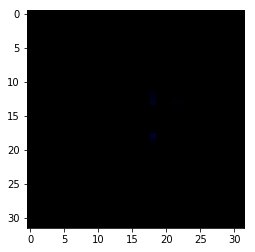

In [93]:
#load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

#load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

loaded_model.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])

image = cv2.imread('rightsign.jpeg',1) 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image =image.astype('float32')
image = cv2.resize(image,(32,32))

#image = keras.utils.normalize(image, axis=1)
image /= 255
image -= 0.5
plt.imshow(image)

img= np.reshape(image, [1,32,32,3])

# check prediction
prediction = loaded_model.predict(img)
index = prediction.argmax(axis=-1)
print(prediction)
print(index)
helper = Helper()
print(helper.dictionary[index])

#evaluate loaded model on test data
#loaded_model.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])
#score = loaded_model.evaluate(X_train, Y_train,verbose=0)
#print("%s: %.2f" % (loaded_model.metrics_names[1], score[1]*100))


In [57]:
# TODO: Preprocess data & one-hot encode the labels
X_test = test['features']
y_test = test['labels']
X_test = X_test.astype('float32')
X_test /= 255
X_test -= 0.5
Y_test = np_utils.to_categorical(y_test, 43)

# TODO: Evaluate model on test data
loaded_model.evaluate(X_test, Y_test)

12630/12630 [==============================] - 6s 440us/step


[0.4670016006024603, 0.9067300079082178]